## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [2]:
# Parameters defined in the question
Length = 1
Time = 20

conductivity = 10
qgen = 1 # Can be changed depending on the question
alpha = 0.05
T_amb = 25
h_amb = 100
T_initial = 0
T_left = 100

In [3]:
num_x = 31 # Params can be changed
num_t = 10001 # Params can be changed

In [4]:
# Partitions, can be changed accordingly for more or less precision
dt = Time / (num_t-1)
dx = Length / (num_x - 1)

# Initial condition
T = T_initial * np.ones([num_x, num_t])

## Numerical simulation

In [5]:
for t in range(1,num_t):
    for i in range(1,num_x-1):
        q = qgen * (np.sin(np.pi * i * dx / Length))*np.exp(-t * dt/Time)
        # Numerical equation
        T[i,t] = T[i, t-1] + (alpha * dt / (dx * dx)) * (T[i-1, t-1] + T[i+1, t-1] - 2*T[i, t-1]) + q * (alpha * dt / conductivity)
    
    # Boundary condditions
    T[0,t] = T_left

    # Adiabatic boundary condition on the right
    T[num_x - 1, t] = T[num_x - 2, t]

## Plotting

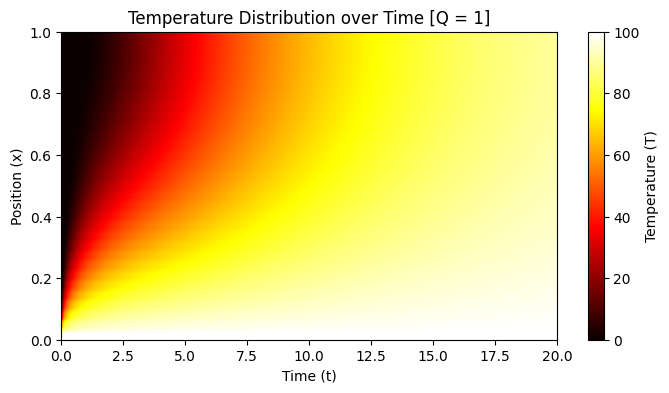

In [6]:
# Simple plotting code block
plt.figure(figsize=(8, 4))
plt.imshow(T[:, :], extent=[0, Time, 0, Length], aspect='auto', cmap='hot', origin='lower')
plt.colorbar(label='Temperature (T)')
plt.ylabel('Position (x)')
plt.xlabel('Time (t)')
plt.title(f"Temperature Distribution over Time [Q = {qgen}]")
plt.show()

## **Observations**

Hover over the plots to see their labels

<img src = "newq1.png" title = "Q = 1" style = "width: 630px;height: 400px"> <img src = "newq10000.png" title = "Q = 10000" style = "width: 630px;height: 400px">

3D plots for better visualization

<img src = "q103d.png" title = "Q = 10,000" style = "width:500px;height:400px"> <img src = "q13d.png" title = "Q = 1" style = "width:500px;height:400px">

## Code for 3D plots

In [144]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
from IPython.display import display, clear_output

In [141]:
x = np.arange(0, 1.001, dx)
t = np.arange(0, 20.001, dt)

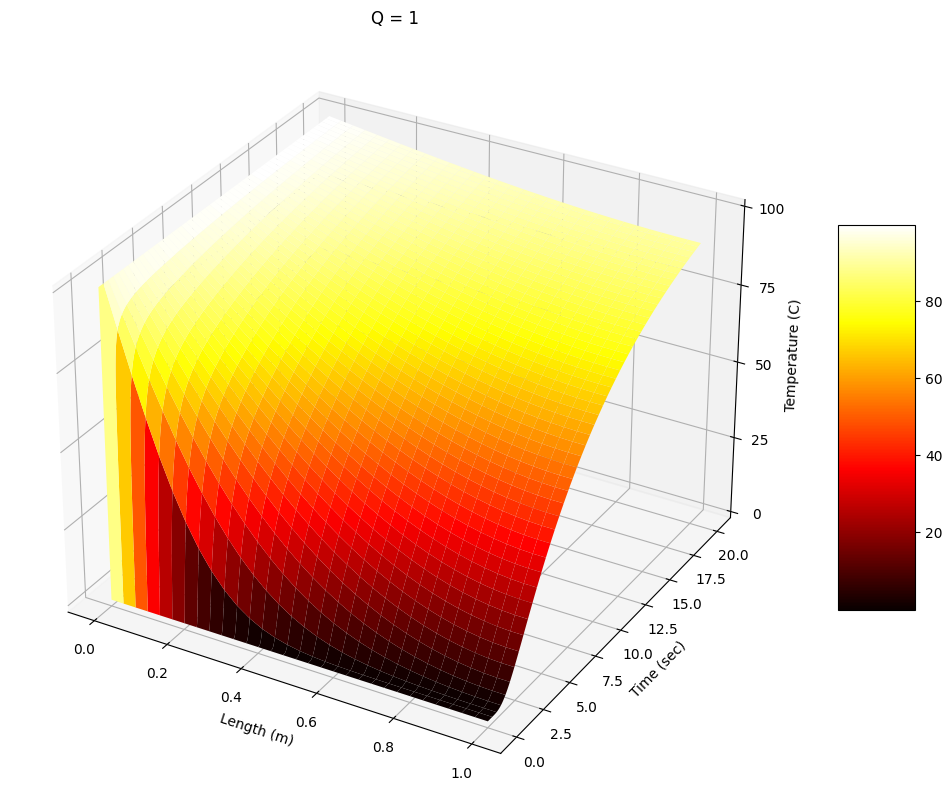

In [142]:
x, t = np.meshgrid(x, t)

fig, axs = plt.subplots(1,1,figsize=(15,10),subplot_kw={"projection":'3d'})
surf=axs.plot_surface(x, t, np.transpose(T),cmap='hot', edgecolor='none')
# Customize the z axis.
axs.zaxis.set_major_locator(LinearLocator(5))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
axs.set_xlabel('Length (m)')
axs.set_ylabel('Time (sec)')
axs.set_zlabel('Temperature (C)')
axs.set_title(f"Q = {qgen}");